# Coleta de Dados

In [21]:
# Importando bibliotecas
# importar as bibliotecas
import sqlite3
import pandas as pd
import gradio as gr
import numpy as np
from sklearn import tree as tr
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
# Conectando ao banco de dados
conn = sqlite3.connect('database.db')

In [23]:
# coletando os dados
consulta_atividade = """
SELECT *
FROM
flight_activity fa
LEFT JOIN flight_loyalty_history flh
ON (fa.loyalty_number = flh.loyalty_number )
"""

In [24]:
# Execucao da consulta
df_atividade = pd.read_sql_query(consulta_atividade, conn)

In [25]:
# Mostrando a Dataframe resultante.
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [26]:
# Veriificando dados faltantes em cada coluna.
df_atividade.isna().sum()

loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
loyalty_number                      0
country                             0
province                            0
city                                0
postal_code                         0
gender                              0
education                           0
salary                         102672
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64

# Limpeza e Tratamento dos Dados

In [27]:
# Selecionando linhas que contém apenas dados numéricos
colunas = ["year", "month", "flights_booked",
"flights_with_companions", "total_flights",
"distance", "points_accumulated", "salary",
"clv", "loyalty_card"]

df_colunas_numericas = df_atividade.loc[:, colunas]

In [28]:
# Remover as linhas que contem dados faltantes
df_dados_completos = df_colunas_numericas.dropna()

# Verificar se existe dados faltantes
df_dados_completos.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

# Treinamento da Inteligência Artificial

In [29]:
# Preparando dados para o treinamento
X_atributos = df_dados_completos.drop( columns="loyalty_card")
y_rotulos = df_dados_completos.loc[:, "loyalty_card"]

In [30]:
# Definição do algoritmo Decision Tree
modelo = tr.DecisionTreeClassifier(max_depth=4)

# Treinando o algoritmo Decision Tree
modelo_treinado = modelo.fit(X_atributos, y_rotulos)

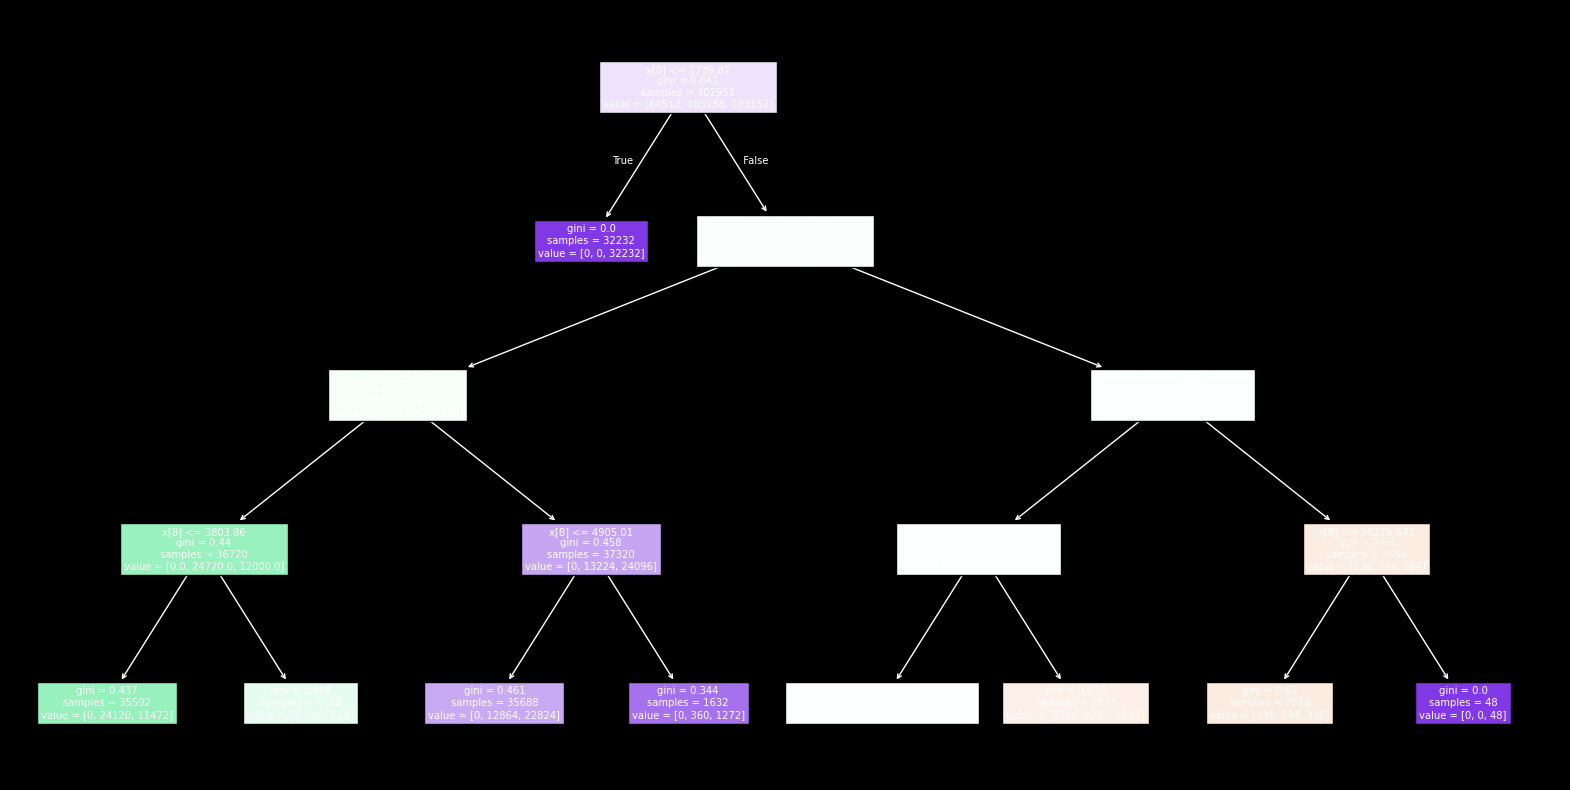

In [42]:
# Algoritmo treinado
plt.figure(figsize=(20,10)) # Ajusta o tamanho da imagem
tr.plot_tree(modelo_treinado, filled=True)
plt.show()

In [45]:
# Previsao para um novo cliente
X_novo = X_atributos.sample()
previsao = modelo_treinado.predict_proba(X_novo)


In [46]:
print("Prob - Aurora: {:.1f}% - Nova: {:.1f}% - Star: {:.1f}%".format( 100*previsao[0][0], 100*previsao[0][1], 100*previsao[0][2]))


Prob - Aurora: 32.4% - Nova: 34.3% - Star: 33.3%


In [55]:
# painel online para mostrar o resultado
def predict(*args):
    X_novo = np.array( [args] ).reshape( 1, -1 )
    previsao = modelo_treinado.predict_proba( X_novo )
    return {"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}

demo = gr.Interface(
    title="Projeto 01: Imersão na área de Dados",
    description="""**Inteligência Artificial para calcular a propensão de compra 
        de clientes** \n\n*Utilize os sliders para ajustar os valores de entrada.*""",
    fn = predict,
    inputs = [
        gr.Radio( [2017,2018], label="year" ),
        gr.Slider(label="month",
            minimum=1, maximum=12, step=1,
            randomize=True ),
        gr.Slider(label="flights_booked",
            minimum=0, maximum=21, step=1,
            randomize=True ),
        gr.Slider(label="flights_with_companions",
            minimum=0, maximum=11, step=1,
            randomize=True ),
        gr.Slider(label="total_flights",
            minimum=0, maximum=32, step=1,
            randomize=True ),
        gr.Slider(label="distance" ,
            minimum=0, maximum=6293, step=1,
            randomize=True ),
        gr.Slider(label="points_accumulated",
            minimum=0.00, maximum=676.50, step=0.1,
            randomize=True ),
        gr.Slider(label="salary" , minimum=-58486.00,
            maximum=407228.00, step=0.1, randomize=True ),
        gr.Slider(label="clv",
            minimum=2119.89, maximum=83325.38, step=0.1,
            randomize=True )
    ],
    outputs = [gr.Label(label='Previsao')]
)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7870
* Running on public URL: https://285162413c78666a04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


c:\Users\danie\OneDrive\Documentos\Cursos\ComunidadeDS\Projeto-01\Projeto\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio\flagged\dataset1.csv


c:\Users\danie\OneDrive\Documentos\Cursos\ComunidadeDS\Projeto-01\Projeto\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
